In [1]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders
from train_new import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

In [2]:
model_name = 'damping'
path = './dataset/damping_0.1x100000_Ts_0.01'

## Varying batch size

  0%|          | 0/600 [00:00<?, ?it/s]

Trainer created.


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 260.652


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 134.106


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 162.586


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 97.383


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 121.641


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 88.375


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 76.611


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 75.611


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 69.553


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 67.898


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 109.394


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 109.663


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 80.578


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 52.053


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 79.514


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 74.247


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 75.862


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 98.836


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 99.994


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 66.035


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 50.488


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 44.379


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 97.816


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 82.108


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 95.008


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 96.819


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 49.811


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 85.485


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 48.617


Epoch 30: 100%|██████████| 600/600 [00:31<00:00, 19.28it/s, loss=37.205] 


val_loss: 49.451
model saved.


<IPython.core.display.Javascript object>


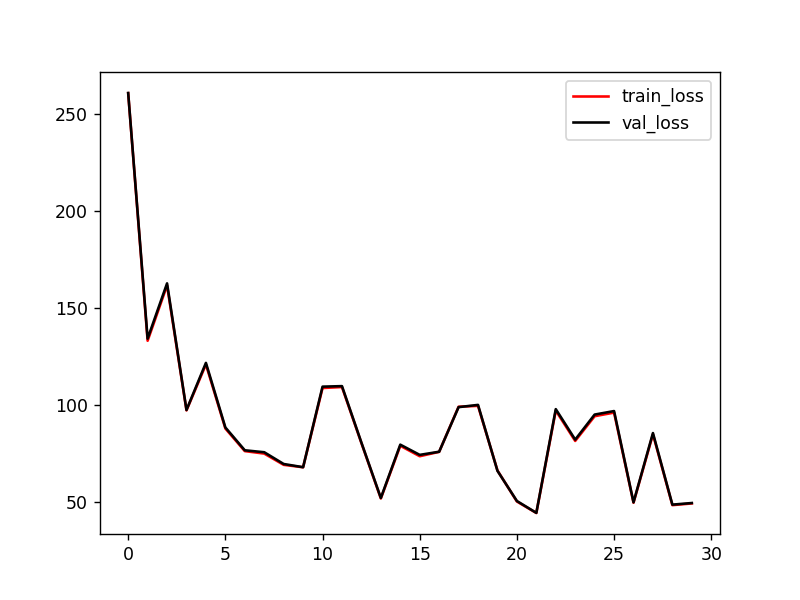

100%|██████████| 200/200 [00:03<00:00, 61.25it/s]


Loss score: 49.30709959030151.
Loss score: 49.30709959030151.
hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 10]_batch_100_model_name_damping


In [11]:
# get dataloaders
batch_size = 100
train_loader1, val_loader1, test_loader1 = get_dataloaders(path,batch_size)

# trainers parameter setting
n = 2
K = 2
struct_encoder = [n,32,64,K,K+n]
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# create trainer
model1 = Koopman(n=n,K=K,u=1)
hyper = [1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,10]
#loss_function = torch.nn.MSELoss(reduction='sum')
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
epochs = 30
file_name1 = train_the_model(device, model_name, model1, loss_function, train_loader1, val_loader1, hyper,epochs, batch_size,P=hyper[6])
plot_learning_curve(file_name1)

# get test result
test_the_model(test_loader1, model1, loss_function, file_name1)
print(file_name1)

<IPython.core.display.Javascript object>


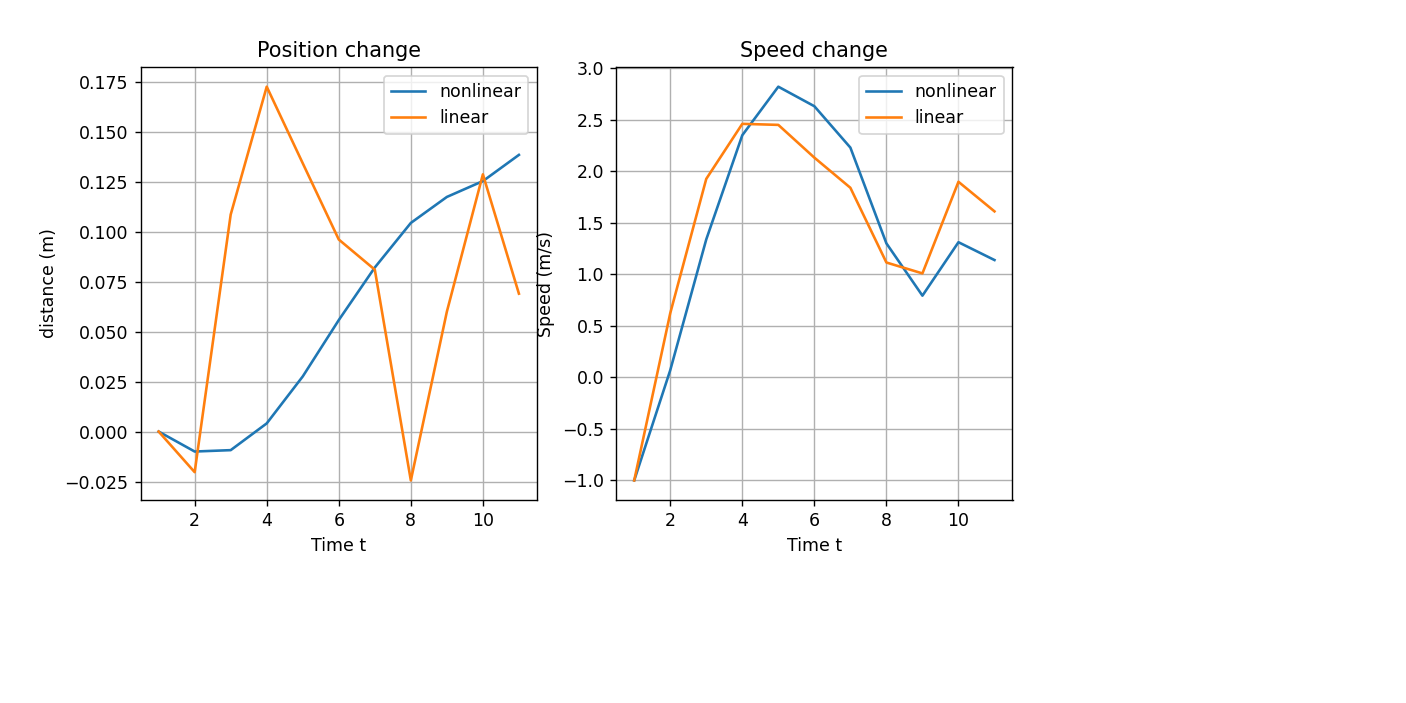

In [13]:
result_sample(path,model_name,model1,file_name1,index=65)

  0%|          | 0/6000 [00:00<?, ?it/s]

Trainer created.


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 4.423


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 5.455


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 3.105


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 3.442


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 1.286


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 0.937


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 2.431


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 2.453


  0%|          | 0/6000 [00:00<?, ?it/s]

val_loss: 1.363


Epoch 10: 100%|██████████| 6000/6000 [04:41<00:00, 21.31it/s, loss=1.112] 


val_loss: 0.765
model saved.


<IPython.core.display.Javascript object>


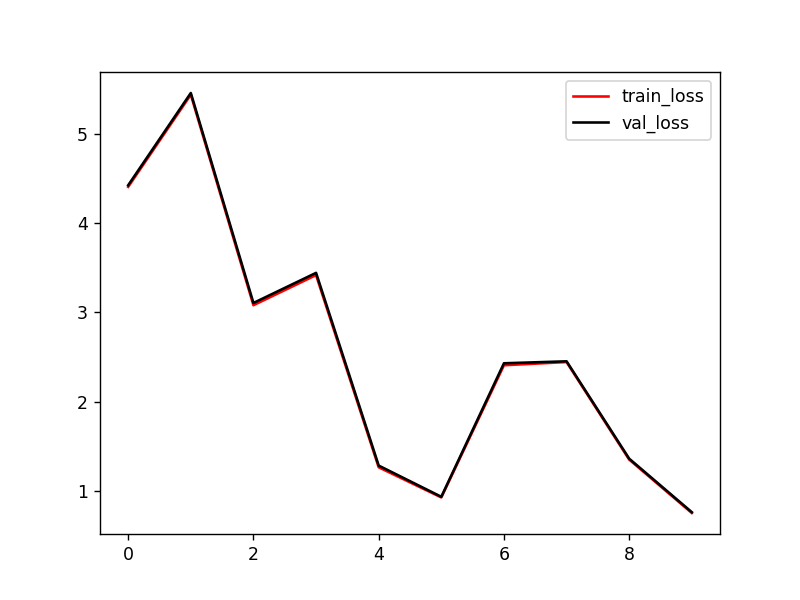

100%|██████████| 2000/2000 [00:25<00:00, 77.97it/s]


Loss score: 0.7542925454080105.
Loss score: 0.7542925454080105.
hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 10]_batch_10_model_name_damping


In [5]:
# trainers parameter setting
n = 2
K = 2
struct_encoder = [n,32,64,K,K+n]
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# create trainer
model2 = Koopman(n=n,K=K,u=1)
hyper = [1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,10]
#loss_function = torch.nn.MSELoss(reduction='sum')
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
epochs = 30
file_name2 = train_the_model(device, model_name, model2, loss_function, train_loader1, val_loader1, hyper,epochs, batch_size,P=hyper[6])
plot_learning_curve(file_name2)

# get test result
test_the_model(test_loader1, model2, loss_function, file_name2)
print(file_name2)

<IPython.core.display.Javascript object>


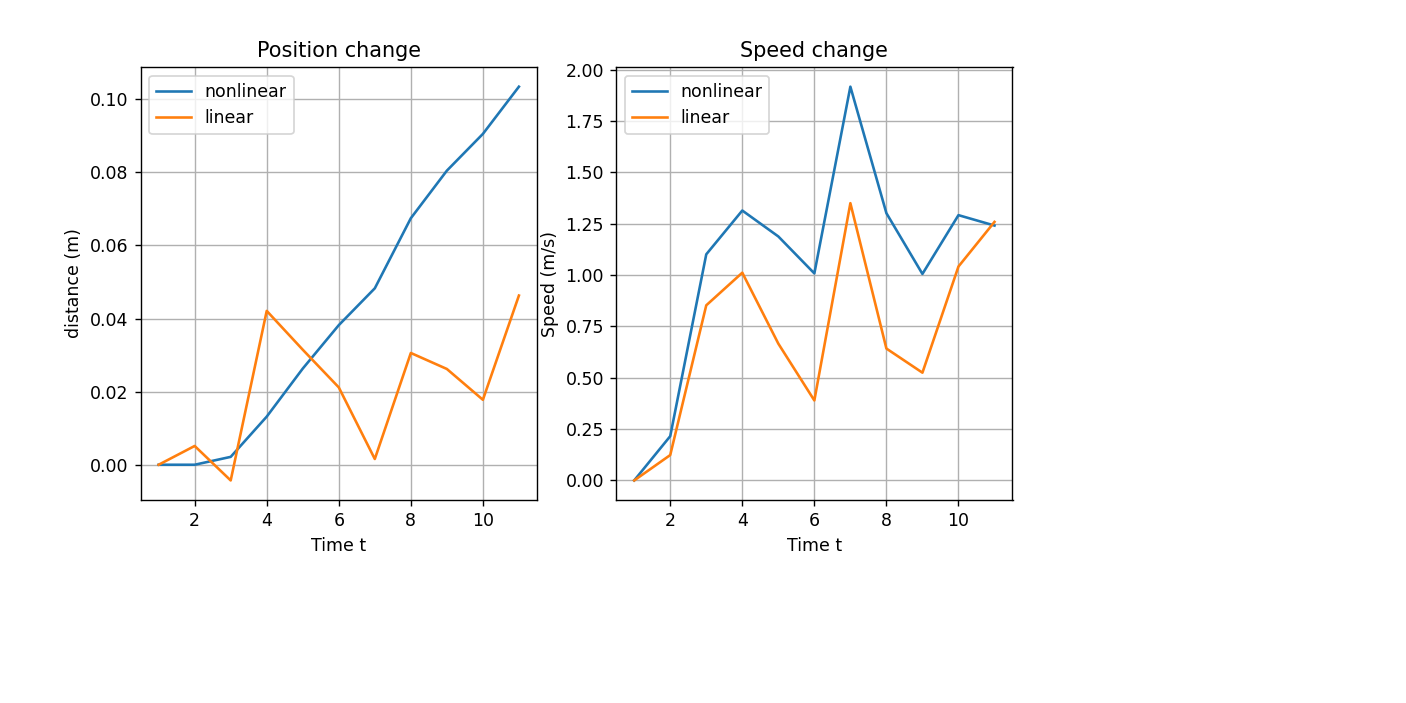

In [9]:
result_sample(path,model_name,model2,file_name2,index=202)

  0%|          | 0/600 [00:00<?, ?it/s]

Trainer created.


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 335.051


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 232.414


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 150.389


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 219.236


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 189.669


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 189.994


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 175.205


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 243.772


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 197.741


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 243.448


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 242.102


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 230.013


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 173.032


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 154.362


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 71.222


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 58.964


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 68.084


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 52.475


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 36.179


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 32.733


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 34.387


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 29.195


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 18.009


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 26.201


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 20.833


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 71.241


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 32.710


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 36.852


  0%|          | 0/600 [00:00<?, ?it/s]

val_loss: 46.998


Epoch 30: 100%|██████████| 600/600 [00:31<00:00, 19.03it/s, loss=40.814] 


val_loss: 38.024
model saved.


<IPython.core.display.Javascript object>


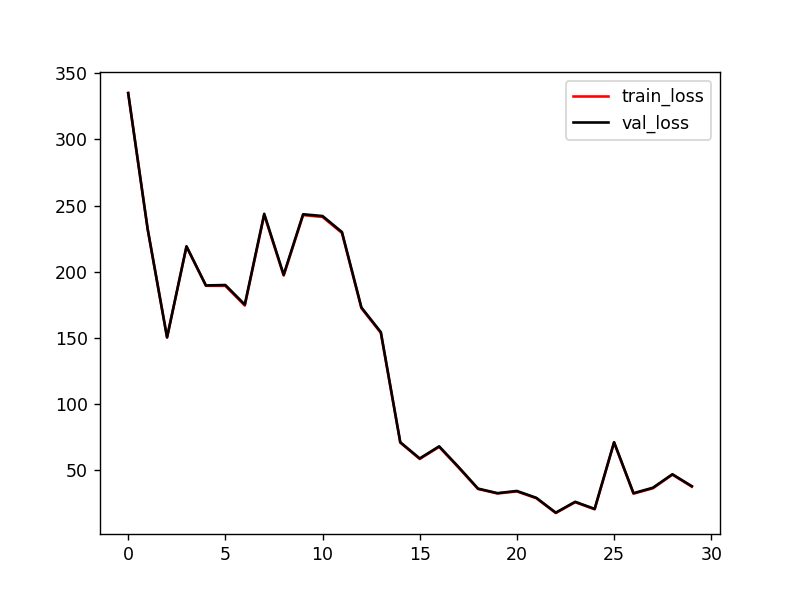

100%|██████████| 200/200 [00:03<00:00, 64.28it/s]


Loss score: 37.63585651397705.
Loss score: 37.63585651397705.
hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 10]_batch_100_model_name_damping


In [3]:
# get dataloaders
batch_size = 100
train_loader2, val_loader2, test_loader2 = get_dataloaders(path,batch_size)

# trainers parameter setting
n = 2
K = 2
struct_encoder = [n,32,64,K,K+n]
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# create trainer
model2 = Koopman(n=n,K=K,u=1)
hyper = [1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,10]
#loss_function = torch.nn.MSELoss(reduction='sum')
loss_function = Loss(hyper[0], hyper[1], hyper[2], hyper[3], hyper[4], hyper[5], hyper[6])

# start training
epochs = 30
file_name2 = train_the_model(device, model_name, model2, loss_function, train_loader2, val_loader2, hyper,epochs, batch_size,P=hyper[6])
plot_learning_curve(file_name2)

# get test result
test_the_model(test_loader2, model2, loss_function, file_name2)
print(file_name2)

<IPython.core.display.Javascript object>


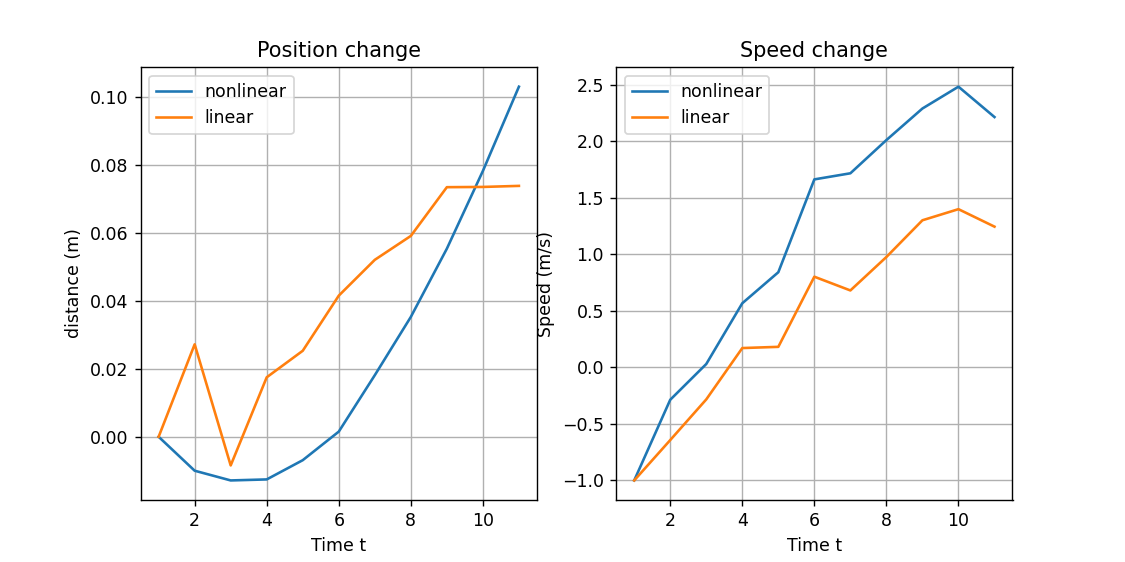

In [6]:
result_sample(path,model_name,model2,file_name2,index=600)

In [8]:
# get dataloaders
batch_size = 100
train_loader3, val_loader3, test_loader3 = get_dataloaders(path,batch_size)

# trainers parameter setting
n = 2
K = 0
struct_encoder = [n,32,64,K,K+n]
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# create trainer
model3 = Koopman(n=n,K=K,u=1)
hyper = [1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,1]
loss_function = torch.nn.MSELoss(reduction='sum')

# start training
epochs = 200
file_name2 = train_the_model(device, model_name, model3, loss_function, train_loader3, val_loader3, hyper,epochs, batch_size,P=hyper[6])
plot_learning_curve(file_name3)

# get test result
test_the_model(test_loader3, model3, loss_function, file_name3)
print(file_name3)

  0%|          | 0/60 [00:00<?, ?it/s]

Trainer created.


Epoch 1: 100%|██████████| 60/60 [00:01<00:00, 55.06it/s, loss=377.992]


Parameter containing:
tensor([[-0.1849,  0.5707],
        [ 0.6403,  0.0010]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.2325,  0.2667],
        [-0.1238,  0.0208]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 382.036


Epoch 2: 100%|██████████| 60/60 [00:01<00:00, 56.07it/s, loss=359.275]


Parameter containing:
tensor([[-0.1242,  0.6299],
        [ 0.7148,  0.0754]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1741,  0.3368],
        [-0.0888,  0.0237]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 365.087


Epoch 3: 100%|██████████| 60/60 [00:01<00:00, 53.17it/s, loss=344.930]


Parameter containing:
tensor([[-0.0617,  0.6913],
        [ 0.8035,  0.1639]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1204,  0.4190],
        [-0.0724,  0.0211]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 353.044


Epoch 4: 100%|██████████| 60/60 [00:01<00:00, 53.08it/s, loss=335.486]


Parameter containing:
tensor([[0.0037, 0.7537],
        [0.9082, 0.2682]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0883,  0.5162],
        [-0.0678,  0.0193]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 345.523


Epoch 5: 100%|██████████| 60/60 [00:01<00:00, 39.54it/s, loss=330.500]


Parameter containing:
tensor([[0.0227, 0.7135],
        [1.0536, 0.4129]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0884,  0.6561],
        [-0.0589,  0.0181]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 342.406


Epoch 6: 100%|██████████| 60/60 [00:01<00:00, 52.64it/s, loss=328.380]


Parameter containing:
tensor([[0.0310, 0.6799],
        [1.1527, 0.5102]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0911,  0.7502],
        [-0.0474,  0.0164]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 341.170


Epoch 7: 100%|██████████| 60/60 [00:01<00:00, 54.49it/s, loss=327.724]


Parameter containing:
tensor([[0.0354, 0.6444],
        [1.1979, 0.5509]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0925,  0.7923],
        [-0.0358,  0.0155]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.938


Epoch 8: 100%|██████████| 60/60 [00:01<00:00, 52.57it/s, loss=327.627]


Parameter containing:
tensor([[0.0375, 0.6081],
        [1.2131, 0.5596]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0927,  0.8064],
        [-0.0245,  0.0145]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.913


Epoch 9: 100%|██████████| 60/60 [00:01<00:00, 54.07it/s, loss=327.618]


Parameter containing:
tensor([[0.0388, 0.5737],
        [1.2172, 0.5559]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0925,  0.8101],
        [-0.0135,  0.0140]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.911


Epoch 10: 100%|██████████| 60/60 [00:01<00:00, 55.84it/s, loss=327.617]


Parameter containing:
tensor([[0.0397, 0.5428],
        [1.2181, 0.5485]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0921,  0.8109],
        [-0.0028,  0.0142]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.911


Epoch 11: 100%|██████████| 60/60 [00:01<00:00, 56.81it/s, loss=327.616]


Parameter containing:
tensor([[0.0404, 0.5152],
        [1.2183, 0.5399]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0918, 0.8110],
        [0.0078, 0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.910


Epoch 12: 100%|██████████| 60/60 [00:01<00:00, 53.81it/s, loss=327.616]


Parameter containing:
tensor([[0.0410, 0.4900],
        [1.2185, 0.5308]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0915, 0.8111],
        [0.0182, 0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.910


Epoch 13: 100%|██████████| 60/60 [00:01<00:00, 55.78it/s, loss=327.616]


Parameter containing:
tensor([[0.0416, 0.4677],
        [1.2186, 0.5214]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0912, 0.8111],
        [0.0284, 0.0123]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.910


Epoch 14: 100%|██████████| 60/60 [00:01<00:00, 52.91it/s, loss=327.615]


Parameter containing:
tensor([[0.0421, 0.4476],
        [1.2187, 0.5117]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0909, 0.8111],
        [0.0385, 0.0119]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.909


Epoch 15: 100%|██████████| 60/60 [00:01<00:00, 56.07it/s, loss=327.615]


Parameter containing:
tensor([[0.0425, 0.4299],
        [1.2188, 0.5017]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0907, 0.8112],
        [0.0486, 0.0115]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.909


Epoch 16: 100%|██████████| 60/60 [00:01<00:00, 57.43it/s, loss=327.615]


Parameter containing:
tensor([[0.0428, 0.4139],
        [1.2189, 0.4914]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0905, 0.8112],
        [0.0585, 0.0112]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.909


Epoch 17: 100%|██████████| 60/60 [00:01<00:00, 55.44it/s, loss=327.615]


Parameter containing:
tensor([[0.0432, 0.4000],
        [1.2190, 0.4808]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0903, 0.8113],
        [0.0685, 0.0111]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.909


Epoch 18: 100%|██████████| 60/60 [00:01<00:00, 56.60it/s, loss=327.615]


Parameter containing:
tensor([[0.0435, 0.3880],
        [1.2191, 0.4700]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0901, 0.8113],
        [0.0784, 0.0103]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.909


Epoch 19: 100%|██████████| 60/60 [00:01<00:00, 55.84it/s, loss=327.615]


Parameter containing:
tensor([[0.0438, 0.3781],
        [1.2192, 0.4590]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0899, 0.8114],
        [0.0883, 0.0098]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.909


Epoch 20: 100%|██████████| 60/60 [00:01<00:00, 51.83it/s, loss=327.614]


Parameter containing:
tensor([[0.0440, 0.3696],
        [1.2194, 0.4477]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0897, 0.8114],
        [0.0984, 0.0093]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 21: 100%|██████████| 60/60 [00:01<00:00, 56.60it/s, loss=327.614]


Parameter containing:
tensor([[0.0443, 0.3629],
        [1.2195, 0.4363]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0895, 0.8115],
        [0.1086, 0.0085]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 22: 100%|██████████| 60/60 [00:01<00:00, 56.55it/s, loss=327.614]


Parameter containing:
tensor([[0.0445, 0.3579],
        [1.2196, 0.4247]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0893, 0.8115],
        [0.1189, 0.0083]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 23: 100%|██████████| 60/60 [00:01<00:00, 55.55it/s, loss=327.614]


Parameter containing:
tensor([[0.0447, 0.3547],
        [1.2197, 0.4130]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0891, 0.8115],
        [0.1295, 0.0086]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 24: 100%|██████████| 60/60 [00:01<00:00, 53.97it/s, loss=327.614]


Parameter containing:
tensor([[0.0449, 0.3534],
        [1.2198, 0.4011]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0889, 0.8116],
        [0.1404, 0.0075]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 25: 100%|██████████| 60/60 [00:01<00:00, 56.19it/s, loss=327.614]


Parameter containing:
tensor([[0.0451, 0.3538],
        [1.2199, 0.3890]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0887, 0.8116],
        [0.1516, 0.0071]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 26: 100%|██████████| 60/60 [00:01<00:00, 54.04it/s, loss=327.614]


Parameter containing:
tensor([[0.0453, 0.3558],
        [1.2201, 0.3769]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0886, 0.8117],
        [0.1632, 0.0068]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 27: 100%|██████████| 60/60 [00:01<00:00, 53.56it/s, loss=327.614]


Parameter containing:
tensor([[0.0455, 0.3599],
        [1.2202, 0.3647]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0884, 0.8118],
        [0.1753, 0.0060]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 28: 100%|██████████| 60/60 [00:01<00:00, 53.75it/s, loss=327.614]


Parameter containing:
tensor([[0.0457, 0.3656],
        [1.2203, 0.3523]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0881, 0.8118],
        [0.1880, 0.0057]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.908


Epoch 29: 100%|██████████| 60/60 [00:01<00:00, 55.66it/s, loss=327.613]


Parameter containing:
tensor([[0.0459, 0.3734],
        [1.2204, 0.3399]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0879, 0.8119],
        [0.2015, 0.0055]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.907


Epoch 30: 100%|██████████| 60/60 [00:01<00:00, 54.17it/s, loss=327.613]


Parameter containing:
tensor([[0.0461, 0.3831],
        [1.2205, 0.3273]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0877, 0.8119],
        [0.2156, 0.0045]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.907


Epoch 31: 100%|██████████| 60/60 [00:01<00:00, 55.32it/s, loss=327.613]


Parameter containing:
tensor([[0.0463, 0.3947],
        [1.2206, 0.3148]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0874, 0.8119],
        [0.2306, 0.0034]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.907


Epoch 32: 100%|██████████| 60/60 [00:01<00:00, 53.73it/s, loss=327.613]


Parameter containing:
tensor([[0.0466, 0.4089],
        [1.2207, 0.3022]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0871, 0.8120],
        [0.2466, 0.0030]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.907


Epoch 33: 100%|██████████| 60/60 [00:01<00:00, 54.06it/s, loss=327.613]


Parameter containing:
tensor([[0.0469, 0.4252],
        [1.2208, 0.2894]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0868, 0.8120],
        [0.2637, 0.0021]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.907


Epoch 34: 100%|██████████| 60/60 [00:01<00:00, 50.04it/s, loss=327.613]


Parameter containing:
tensor([[0.0472, 0.4437],
        [1.2209, 0.2767]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.0864, 0.8121],
        [0.2821, 0.0013]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.907


Epoch 35: 100%|██████████| 60/60 [00:01<00:00, 47.84it/s, loss=327.612]


Parameter containing:
tensor([[0.0475, 0.4643],
        [1.2210, 0.2639]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[8.5987e-02, 8.1215e-01],
        [3.0179e-01, 3.4396e-04]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.906


Epoch 36: 100%|██████████| 60/60 [00:01<00:00, 53.98it/s, loss=327.612]


Parameter containing:
tensor([[0.0479, 0.4878],
        [1.2211, 0.2511]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0855,  0.8122],
        [ 0.3230, -0.0009]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.906


Epoch 37: 100%|██████████| 60/60 [00:01<00:00, 53.51it/s, loss=327.612]


Parameter containing:
tensor([[0.0483, 0.5133],
        [1.2212, 0.2382]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0849,  0.8122],
        [ 0.3457, -0.0022]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.906


Epoch 38: 100%|██████████| 60/60 [00:01<00:00, 56.60it/s, loss=327.612]


Parameter containing:
tensor([[0.0488, 0.5416],
        [1.2213, 0.2254]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0843,  0.8123],
        [ 0.3701, -0.0039]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.906


Epoch 39: 100%|██████████| 60/60 [00:01<00:00, 53.10it/s, loss=327.611]


Parameter containing:
tensor([[0.0493, 0.5722],
        [1.2214, 0.2125]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0835,  0.8123],
        [ 0.3961, -0.0054]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.905


Epoch 40: 100%|██████████| 60/60 [00:01<00:00, 51.08it/s, loss=327.611]


Parameter containing:
tensor([[0.0499, 0.6047],
        [1.2215, 0.1996]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0827,  0.8124],
        [ 0.4239, -0.0068]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.905


Epoch 41: 100%|██████████| 60/60 [00:01<00:00, 55.71it/s, loss=327.611]


Parameter containing:
tensor([[0.0506, 0.6395],
        [1.2216, 0.1867]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0816,  0.8124],
        [ 0.4533, -0.0087]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.904


Epoch 42: 100%|██████████| 60/60 [00:01<00:00, 56.09it/s, loss=327.610]


Parameter containing:
tensor([[0.0514, 0.6761],
        [1.2217, 0.1738]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0804,  0.8125],
        [ 0.4842, -0.0114]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.904


Epoch 43: 100%|██████████| 60/60 [00:01<00:00, 55.59it/s, loss=327.610]


Parameter containing:
tensor([[0.0522, 0.7145],
        [1.2218, 0.1610]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0790,  0.8125],
        [ 0.5165, -0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.904


Epoch 44: 100%|██████████| 60/60 [00:01<00:00, 54.76it/s, loss=327.609]


Parameter containing:
tensor([[0.0531, 0.7537],
        [1.2219, 0.1483]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0774,  0.8126],
        [ 0.5498, -0.0159]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.903


Epoch 45: 100%|██████████| 60/60 [00:01<00:00, 55.50it/s, loss=327.609]


Parameter containing:
tensor([[0.0540, 0.7935],
        [1.2220, 0.1357]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0755,  0.8127],
        [ 0.5838, -0.0183]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.903


Epoch 46: 100%|██████████| 60/60 [00:01<00:00, 55.88it/s, loss=327.608]


Parameter containing:
tensor([[0.0550, 0.8335],
        [1.2221, 0.1233]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0733,  0.8128],
        [ 0.6182, -0.0209]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.902


Epoch 47: 100%|██████████| 60/60 [00:01<00:00, 56.11it/s, loss=327.608]


Parameter containing:
tensor([[0.0560, 0.8724],
        [1.2222, 0.1111]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0709,  0.8128],
        [ 0.6523, -0.0239]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.902


Epoch 48: 100%|██████████| 60/60 [00:01<00:00, 53.46it/s, loss=327.607]


Parameter containing:
tensor([[0.0569, 0.9101],
        [1.2223, 0.0992]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0681,  0.8130],
        [ 0.6857, -0.0270]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.901


Epoch 49: 100%|██████████| 60/60 [00:01<00:00, 48.86it/s, loss=327.607]


Parameter containing:
tensor([[0.0578, 0.9462],
        [1.2225, 0.0878]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0650,  0.8131],
        [ 0.7178, -0.0296]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.901


Epoch 50: 100%|██████████| 60/60 [00:01<00:00, 54.16it/s, loss=327.606]


Parameter containing:
tensor([[0.0586, 0.9801],
        [1.2227, 0.0768]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0615,  0.8132],
        [ 0.7485, -0.0321]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.900


Epoch 51: 100%|██████████| 60/60 [00:01<00:00, 55.70it/s, loss=327.606]


Parameter containing:
tensor([[0.0592, 1.0116],
        [1.2229, 0.0665]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0577,  0.8134],
        [ 0.7770, -0.0346]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.900


Epoch 52: 100%|██████████| 60/60 [00:01<00:00, 54.05it/s, loss=327.605]


Parameter containing:
tensor([[0.0596, 1.0408],
        [1.2231, 0.0568]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0535,  0.8136],
        [ 0.8034, -0.0368]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.899


Epoch 53: 100%|██████████| 60/60 [00:01<00:00, 55.04it/s, loss=327.605]


Parameter containing:
tensor([[0.0598, 1.0679],
        [1.2233, 0.0480]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0490,  0.8138],
        [ 0.8271, -0.0388]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.899


Epoch 54: 100%|██████████| 60/60 [00:01<00:00, 56.23it/s, loss=327.605]


Parameter containing:
tensor([[0.0596, 1.0935],
        [1.2236, 0.0400]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0439,  0.8140],
        [ 0.8482, -0.0403]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.899


Epoch 55: 100%|██████████| 60/60 [00:01<00:00, 52.97it/s, loss=327.604]


Parameter containing:
tensor([[0.0590, 1.1184],
        [1.2238, 0.0329]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0383,  0.8142],
        [ 0.8665, -0.0414]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.898


Epoch 56: 100%|██████████| 60/60 [00:01<00:00, 55.52it/s, loss=327.604]


Parameter containing:
tensor([[0.0579, 1.1442],
        [1.2241, 0.0269]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0321,  0.8145],
        [ 0.8820, -0.0418]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.898


Epoch 57: 100%|██████████| 60/60 [00:01<00:00, 54.37it/s, loss=327.603]


Parameter containing:
tensor([[0.0560, 1.1728],
        [1.2245, 0.0220]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0249,  0.8148],
        [ 0.8945, -0.0416]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.897


Epoch 58: 100%|██████████| 60/60 [00:01<00:00, 55.05it/s, loss=327.603]


Parameter containing:
tensor([[0.0529, 1.2079],
        [1.2249, 0.0183]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0163,  0.8152],
        [ 0.9039, -0.0403]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.896


Epoch 59: 100%|██████████| 60/60 [00:01<00:00, 54.52it/s, loss=327.602]


Parameter containing:
tensor([[0.0476, 1.2558],
        [1.2253, 0.0162]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0054,  0.8156],
        [ 0.9092, -0.0372]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.895


Epoch 60: 100%|██████████| 60/60 [00:01<00:00, 54.68it/s, loss=327.599]


Parameter containing:
tensor([[0.0372, 1.3340],
        [1.2258, 0.0160]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0107,  0.8160],
        [ 0.9087, -0.0305]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 340.891


Epoch 61: 100%|██████████| 60/60 [00:01<00:00, 55.91it/s, loss=327.521]


Parameter containing:
tensor([[-0.0393,  1.5159],
        [ 1.2261,  0.0189]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0721,  0.8164],
        [ 0.8758,  0.0112]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 339.531


Epoch 62: 100%|██████████| 60/60 [00:01<00:00, 55.21it/s, loss=303.017]


Parameter containing:
tensor([[-0.2931,  1.3859],
        [ 1.2257,  0.0198]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.3743,  0.8160],
        [ 0.5097,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 278.709


Epoch 63: 100%|██████████| 60/60 [00:01<00:00, 56.38it/s, loss=225.296]


Parameter containing:
tensor([[-0.4810,  1.2487],
        [ 1.2256,  0.0200]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.5634,  0.8159],
        [ 0.2660,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 187.833


Epoch 64: 100%|██████████| 60/60 [00:01<00:00, 55.66it/s, loss=139.784]


Parameter containing:
tensor([[-0.6361,  1.1199],
        [ 1.2256,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.7126,  0.8159],
        [ 0.1058,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 104.352


Epoch 65: 100%|██████████| 60/60 [00:01<00:00, 51.73it/s, loss=68.990]


Parameter containing:
tensor([[-0.7710,  1.0003],
        [ 1.2256,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.8427,  0.8159],
        [ 0.0173,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 42.474


Epoch 66: 100%|██████████| 60/60 [00:01<00:00, 55.22it/s, loss=22.272]


Parameter containing:
tensor([[-0.8917,  0.8889],
        [ 1.2255,  0.0205]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.9613,  0.8158],
        [-0.0032,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 7.208


Epoch 67: 100%|██████████| 60/60 [00:01<00:00, 56.09it/s, loss=1.636]


Parameter containing:
tensor([[-0.9665,  0.7568],
        [ 1.2255,  0.0216]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0355,  0.8158],
        [-0.0029,  0.0131]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.042


Epoch 68: 100%|██████████| 60/60 [00:01<00:00, 56.49it/s, loss=0.040]


Parameter containing:
tensor([[-0.9672,  0.6152],
        [ 1.2255,  0.0238]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0358,  0.8158],
        [-0.0024,  0.0139]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.037


Epoch 69: 100%|██████████| 60/60 [00:01<00:00, 55.81it/s, loss=0.036]


Parameter containing:
tensor([[-0.9671,  0.5088],
        [ 1.2254,  0.0251]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0354,  0.8157],
        [-0.0028,  0.0128]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.034


Epoch 70: 100%|██████████| 60/60 [00:01<00:00, 55.44it/s, loss=0.033]


Parameter containing:
tensor([[-0.9670,  0.4241],
        [ 1.2254,  0.0258]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0353,  0.8157],
        [-0.0026,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.032


Epoch 71: 100%|██████████| 60/60 [00:01<00:00, 56.50it/s, loss=0.032]


Parameter containing:
tensor([[-0.9670,  0.3548],
        [ 1.2254,  0.0260]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8157],
        [-0.0036,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.031


Epoch 72: 100%|██████████| 60/60 [00:01<00:00, 55.34it/s, loss=0.031]


Parameter containing:
tensor([[-0.9670,  0.2968],
        [ 1.2254,  0.0259]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8157],
        [-0.0027,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.030


Epoch 73: 100%|██████████| 60/60 [00:01<00:00, 54.11it/s, loss=0.030]


Parameter containing:
tensor([[-0.9670,  0.2479],
        [ 1.2254,  0.0257]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8157],
        [-0.0024,  0.0140]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.030


Epoch 74: 100%|██████████| 60/60 [00:01<00:00, 52.10it/s, loss=0.030]


Parameter containing:
tensor([[-0.9669,  0.2065],
        [ 1.2254,  0.0254]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8158],
        [-0.0025,  0.0130]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.029


Epoch 75: 100%|██████████| 60/60 [00:01<00:00, 53.44it/s, loss=0.029]


Parameter containing:
tensor([[-0.9668,  0.1714],
        [ 1.2254,  0.0250]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0020,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.029


Epoch 76: 100%|██████████| 60/60 [00:01<00:00, 56.09it/s, loss=0.029]


Parameter containing:
tensor([[-0.9669,  0.1416],
        [ 1.2254,  0.0245]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0025,  0.0142]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.029


Epoch 77: 100%|██████████| 60/60 [00:01<00:00, 53.81it/s, loss=0.029]


Parameter containing:
tensor([[-0.9668,  0.1163],
        [ 1.2254,  0.0241]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0024,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 78: 100%|██████████| 60/60 [00:01<00:00, 56.60it/s, loss=0.029]


Parameter containing:
tensor([[-0.9668,  0.0950],
        [ 1.2255,  0.0236]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0027,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 79: 100%|██████████| 60/60 [00:01<00:00, 52.77it/s, loss=0.029]


Parameter containing:
tensor([[-0.9668,  0.0770],
        [ 1.2255,  0.0232]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0032,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 80: 100%|██████████| 60/60 [00:01<00:00, 48.49it/s, loss=0.028]


Parameter containing:
tensor([[-0.9668,  0.0620],
        [ 1.2255,  0.0228]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0029,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 81: 100%|██████████| 60/60 [00:01<00:00, 49.96it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0495],
        [ 1.2255,  0.0224]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0034,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 82: 100%|██████████| 60/60 [00:01<00:00, 51.77it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0391],
        [ 1.2255,  0.0221]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0027,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 83: 100%|██████████| 60/60 [00:01<00:00, 54.62it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0306],
        [ 1.2255,  0.0218]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0030,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 84: 100%|██████████| 60/60 [00:01<00:00, 55.61it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0236],
        [ 1.2255,  0.0216]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0035,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 85: 100%|██████████| 60/60 [00:01<00:00, 48.54it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0180],
        [ 1.2255,  0.0214]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0025,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 86: 100%|██████████| 60/60 [00:01<00:00, 44.29it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0134],
        [ 1.2255,  0.0212]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0031,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 87: 100%|██████████| 60/60 [00:01<00:00, 48.60it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0098],
        [ 1.2255,  0.0210]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0024,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 88: 100%|██████████| 60/60 [00:01<00:00, 52.17it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0069],
        [ 1.2255,  0.0209]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0028,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 89: 100%|██████████| 60/60 [00:01<00:00, 55.28it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0046],
        [ 1.2255,  0.0208]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0030,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 90: 100%|██████████| 60/60 [00:01<00:00, 54.76it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0029],
        [ 1.2255,  0.0207]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0028,  0.0129]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 91: 100%|██████████| 60/60 [00:01<00:00, 56.60it/s, loss=0.028]


Parameter containing:
tensor([[-0.9667,  0.0015],
        [ 1.2255,  0.0206]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0023,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 92: 100%|██████████| 60/60 [00:01<00:00, 54.18it/s, loss=0.028]


Parameter containing:
tensor([[-9.6666e-01,  4.7436e-04],
        [ 1.2255e+00,  2.0539e-02]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0034,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 93: 100%|██████████| 60/60 [00:01<00:00, 55.53it/s, loss=0.028]


Parameter containing:
tensor([[-9.6665e-01, -3.2476e-04],
        [ 1.2255e+00,  2.0477e-02]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0030,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 94: 100%|██████████| 60/60 [00:01<00:00, 51.36it/s, loss=0.028]


Parameter containing:
tensor([[-9.6665e-01, -9.1173e-04],
        [ 1.2255e+00,  2.0444e-02]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0030,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 95: 100%|██████████| 60/60 [00:01<00:00, 54.87it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0014],
        [ 1.2255,  0.0204]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0023,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 96: 100%|██████████| 60/60 [00:01<00:00, 54.58it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0017],
        [ 1.2255,  0.0204]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0033,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 97: 100%|██████████| 60/60 [00:01<00:00, 54.10it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0019],
        [ 1.2255,  0.0204]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0030,  0.0128]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 98: 100%|██████████| 60/60 [00:01<00:00, 54.05it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0021],
        [ 1.2255,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0026,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 99: 100%|██████████| 60/60 [00:01<00:00, 54.26it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0022],
        [ 1.2255,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0031,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 100: 100%|██████████| 60/60 [00:01<00:00, 55.65it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0023],
        [ 1.2255,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0023,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 101: 100%|██████████| 60/60 [00:01<00:00, 52.88it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0024],
        [ 1.2255,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0023,  0.0140]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 102: 100%|██████████| 60/60 [00:01<00:00, 52.97it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0024],
        [ 1.2255,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0031,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 103: 100%|██████████| 60/60 [00:01<00:00, 55.05it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0024],
        [ 1.2255,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0025,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 104: 100%|██████████| 60/60 [00:01<00:00, 53.14it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0031,  0.0131]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 105: 100%|██████████| 60/60 [00:01<00:00, 54.06it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0022,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 106: 100%|██████████| 60/60 [00:01<00:00, 56.46it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0026,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 107: 100%|██████████| 60/60 [00:01<00:00, 55.32it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0029,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 108: 100%|██████████| 60/60 [00:01<00:00, 53.10it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0021,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 109: 100%|██████████| 60/60 [00:01<00:00, 53.58it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0030,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 110: 100%|██████████| 60/60 [00:01<00:00, 53.63it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0041,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.029


Epoch 111: 100%|██████████| 60/60 [00:01<00:00, 52.97it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0345,  0.8158],
        [-0.0023,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 112: 100%|██████████| 60/60 [00:01<00:00, 55.55it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0022,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 113: 100%|██████████| 60/60 [00:01<00:00, 51.06it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0032,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 114: 100%|██████████| 60/60 [00:01<00:00, 56.34it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0025,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 115: 100%|██████████| 60/60 [00:01<00:00, 53.10it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0024,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 116: 100%|██████████| 60/60 [00:01<00:00, 53.56it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0031,  0.0127]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 117: 100%|██████████| 60/60 [00:01<00:00, 55.06it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0027,  0.0130]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 118: 100%|██████████| 60/60 [00:01<00:00, 51.45it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0030,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 119: 100%|██████████| 60/60 [00:01<00:00, 56.92it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0031,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 120: 100%|██████████| 60/60 [00:01<00:00, 56.79it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0030,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 121: 100%|██████████| 60/60 [00:01<00:00, 56.75it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0028,  0.0130]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 122: 100%|██████████| 60/60 [00:01<00:00, 56.03it/s, loss=0.028]


Parameter containing:
tensor([[-0.9666, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0027,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 123: 100%|██████████| 60/60 [00:01<00:00, 51.23it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0021,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 124: 100%|██████████| 60/60 [00:01<00:00, 55.91it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0023,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 125: 100%|██████████| 60/60 [00:01<00:00, 56.07it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0028,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 126: 100%|██████████| 60/60 [00:01<00:00, 55.42it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0030,  0.0131]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 127: 100%|██████████| 60/60 [00:01<00:00, 56.16it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0027,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 128: 100%|██████████| 60/60 [00:01<00:00, 54.56it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0346,  0.8158],
        [-0.0024,  0.0128]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 129: 100%|██████████| 60/60 [00:01<00:00, 54.54it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0022,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 130: 100%|██████████| 60/60 [00:01<00:00, 53.59it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0026,  0.0126]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 131: 100%|██████████| 60/60 [00:01<00:00, 55.95it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0023,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 132: 100%|██████████| 60/60 [00:01<00:00, 39.29it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0023,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 133: 100%|██████████| 60/60 [00:01<00:00, 53.63it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8158],
        [-0.0021,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 134: 100%|██████████| 60/60 [00:01<00:00, 49.79it/s, loss=0.028]


Parameter containing:
tensor([[-0.9665, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8159],
        [-0.0031,  0.0129]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 135: 100%|██████████| 60/60 [00:01<00:00, 55.64it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0024],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8159],
        [-0.0035,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 136: 100%|██████████| 60/60 [00:01<00:00, 54.75it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8159],
        [-0.0031,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 137: 100%|██████████| 60/60 [00:01<00:00, 55.72it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8159],
        [-0.0023,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 138: 100%|██████████| 60/60 [00:01<00:00, 56.12it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2254,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0347,  0.8159],
        [-0.0034,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 139: 100%|██████████| 60/60 [00:01<00:00, 52.50it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0016,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 140: 100%|██████████| 60/60 [00:01<00:00, 54.35it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0028,  0.0143]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 141: 100%|██████████| 60/60 [00:01<00:00, 55.49it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0021,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 142: 100%|██████████| 60/60 [00:01<00:00, 56.08it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0021,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 143: 100%|██████████| 60/60 [00:01<00:00, 53.05it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0017,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 144: 100%|██████████| 60/60 [00:01<00:00, 56.38it/s, loss=0.028]


Parameter containing:
tensor([[-0.9664, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0029,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 145: 100%|██████████| 60/60 [00:01<00:00, 55.57it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0021,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 146: 100%|██████████| 60/60 [00:01<00:00, 54.63it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0023,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 147: 100%|██████████| 60/60 [00:01<00:00, 54.05it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0348,  0.8159],
        [-0.0022,  0.0139]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 148: 100%|██████████| 60/60 [00:01<00:00, 52.76it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0028,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 149: 100%|██████████| 60/60 [00:01<00:00, 54.54it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0023,  0.0142]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 150: 100%|██████████| 60/60 [00:01<00:00, 52.92it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0032,  0.0131]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 151: 100%|██████████| 60/60 [00:01<00:00, 54.79it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0032,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 152: 100%|██████████| 60/60 [00:01<00:00, 54.09it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0027,  0.0140]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 153: 100%|██████████| 60/60 [00:01<00:00, 53.68it/s, loss=0.028]


Parameter containing:
tensor([[-0.9663, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0028,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 154: 100%|██████████| 60/60 [00:01<00:00, 53.15it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0349,  0.8159],
        [-0.0022,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 155: 100%|██████████| 60/60 [00:01<00:00, 53.50it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8159],
        [-0.0020,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 156: 100%|██████████| 60/60 [00:01<00:00, 55.32it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8159],
        [-0.0024,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 157: 100%|██████████| 60/60 [00:01<00:00, 54.86it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8159],
        [-0.0018,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 158: 100%|██████████| 60/60 [00:01<00:00, 53.56it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2253,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8159],
        [-0.0032,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 159: 100%|██████████| 60/60 [00:01<00:00, 55.45it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8159],
        [-0.0024,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 160: 100%|██████████| 60/60 [00:01<00:00, 49.03it/s, loss=0.028]


Parameter containing:
tensor([[-0.9662, -0.0025],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8159],
        [-0.0023,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 161: 100%|██████████| 60/60 [00:01<00:00, 52.87it/s, loss=0.028]


Parameter containing:
tensor([[-0.9661, -0.0024],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0350,  0.8160],
        [-0.0031,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 162: 100%|██████████| 60/60 [00:01<00:00, 53.39it/s, loss=0.028]


Parameter containing:
tensor([[-0.9661, -0.0024],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8160],
        [-0.0031,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 163: 100%|██████████| 60/60 [00:01<00:00, 55.77it/s, loss=0.028]


Parameter containing:
tensor([[-0.9661, -0.0025],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8160],
        [-0.0024,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 164: 100%|██████████| 60/60 [00:01<00:00, 52.64it/s, loss=0.028]


Parameter containing:
tensor([[-0.9661, -0.0025],
        [ 1.2252,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8160],
        [-0.0023,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 165: 100%|██████████| 60/60 [00:01<00:00, 54.77it/s, loss=0.028]


Parameter containing:
tensor([[-0.9661, -0.0026],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8160],
        [-0.0024,  0.0139]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 166: 100%|██████████| 60/60 [00:01<00:00, 54.40it/s, loss=0.028]


Parameter containing:
tensor([[-0.9661, -0.0026],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8160],
        [-0.0020,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 167: 100%|██████████| 60/60 [00:01<00:00, 55.54it/s, loss=0.028]


Parameter containing:
tensor([[-0.9660, -0.0026],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0351,  0.8160],
        [-0.0020,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 168: 100%|██████████| 60/60 [00:01<00:00, 54.82it/s, loss=0.028]


Parameter containing:
tensor([[-0.9660, -0.0024],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0352,  0.8160],
        [-0.0030,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 169: 100%|██████████| 60/60 [00:01<00:00, 55.48it/s, loss=0.028]


Parameter containing:
tensor([[-0.9660, -0.0025],
        [ 1.2252,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0352,  0.8160],
        [-0.0022,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 170: 100%|██████████| 60/60 [00:01<00:00, 54.49it/s, loss=0.028]


Parameter containing:
tensor([[-0.9660, -0.0023],
        [ 1.2251,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0352,  0.8160],
        [-0.0039,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.029


Epoch 171: 100%|██████████| 60/60 [00:01<00:00, 53.91it/s, loss=0.028]


Parameter containing:
tensor([[-0.9659, -0.0025],
        [ 1.2251,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0353,  0.8160],
        [-0.0018,  0.0131]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 172: 100%|██████████| 60/60 [00:01<00:00, 55.54it/s, loss=0.028]


Parameter containing:
tensor([[-0.9659, -0.0024],
        [ 1.2251,  0.0204]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0353,  0.8161],
        [-0.0031,  0.0129]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 173: 100%|██████████| 60/60 [00:01<00:00, 54.05it/s, loss=0.028]


Parameter containing:
tensor([[-0.9659, -0.0025],
        [ 1.2251,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0353,  0.8161],
        [-0.0019,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 174: 100%|██████████| 60/60 [00:01<00:00, 54.46it/s, loss=0.028]


Parameter containing:
tensor([[-0.9658, -0.0025],
        [ 1.2251,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0354,  0.8161],
        [-0.0021,  0.0132]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 175: 100%|██████████| 60/60 [00:01<00:00, 56.16it/s, loss=0.028]


Parameter containing:
tensor([[-0.9658, -0.0023],
        [ 1.2251,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0354,  0.8161],
        [-0.0030,  0.0140]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 176: 100%|██████████| 60/60 [00:01<00:00, 51.14it/s, loss=0.028]


Parameter containing:
tensor([[-0.9658, -0.0024],
        [ 1.2250,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0354,  0.8161],
        [-0.0027,  0.0134]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 177: 100%|██████████| 60/60 [00:01<00:00, 54.42it/s, loss=0.028]


Parameter containing:
tensor([[-0.9658, -0.0025],
        [ 1.2250,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0354,  0.8161],
        [-0.0029,  0.0130]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 178: 100%|██████████| 60/60 [00:01<00:00, 55.05it/s, loss=0.028]


Parameter containing:
tensor([[-0.9657, -0.0024],
        [ 1.2250,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0355,  0.8161],
        [-0.0027,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 179: 100%|██████████| 60/60 [00:01<00:00, 55.67it/s, loss=0.028]


Parameter containing:
tensor([[-0.9657, -0.0025],
        [ 1.2250,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0355,  0.8161],
        [-0.0034,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 180: 100%|██████████| 60/60 [00:01<00:00, 54.55it/s, loss=0.028]


Parameter containing:
tensor([[-0.9657, -0.0024],
        [ 1.2250,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0356,  0.8161],
        [-0.0029,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 181: 100%|██████████| 60/60 [00:01<00:00, 55.56it/s, loss=0.028]


Parameter containing:
tensor([[-0.9656, -0.0026],
        [ 1.2250,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0356,  0.8161],
        [-0.0028,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 182: 100%|██████████| 60/60 [00:01<00:00, 52.63it/s, loss=0.028]


Parameter containing:
tensor([[-0.9656, -0.0025],
        [ 1.2250,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0356,  0.8161],
        [-0.0029,  0.0130]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 183: 100%|██████████| 60/60 [00:01<00:00, 54.51it/s, loss=0.028]


Parameter containing:
tensor([[-0.9656, -0.0024],
        [ 1.2250,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0356,  0.8161],
        [-0.0024,  0.0139]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 184: 100%|██████████| 60/60 [00:01<00:00, 53.09it/s, loss=0.028]


Parameter containing:
tensor([[-0.9655, -0.0023],
        [ 1.2249,  0.0204]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0357,  0.8162],
        [-0.0027,  0.0127]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 185: 100%|██████████| 60/60 [00:01<00:00, 54.62it/s, loss=0.028]


Parameter containing:
tensor([[-0.9655, -0.0026],
        [ 1.2249,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0357,  0.8162],
        [-0.0034,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 186: 100%|██████████| 60/60 [00:01<00:00, 53.40it/s, loss=0.028]


Parameter containing:
tensor([[-0.9654, -0.0024],
        [ 1.2249,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0358,  0.8162],
        [-0.0026,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 187: 100%|██████████| 60/60 [00:01<00:00, 53.31it/s, loss=0.028]


Parameter containing:
tensor([[-0.9654, -0.0025],
        [ 1.2249,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0358,  0.8162],
        [-0.0026,  0.0139]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 188: 100%|██████████| 60/60 [00:01<00:00, 54.77it/s, loss=0.028]


Parameter containing:
tensor([[-0.9654, -0.0024],
        [ 1.2248,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0358,  0.8162],
        [-0.0023,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 189: 100%|██████████| 60/60 [00:01<00:00, 50.29it/s, loss=0.028]


Parameter containing:
tensor([[-0.9654, -0.0024],
        [ 1.2248,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0359,  0.8162],
        [-0.0028,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 190: 100%|██████████| 60/60 [00:01<00:00, 54.40it/s, loss=0.028]


Parameter containing:
tensor([[-0.9653, -0.0026],
        [ 1.2248,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0359,  0.8162],
        [-0.0021,  0.0144]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 191: 100%|██████████| 60/60 [00:01<00:00, 54.00it/s, loss=0.028]


Parameter containing:
tensor([[-0.9653, -0.0023],
        [ 1.2248,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0359,  0.8162],
        [-0.0034,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 192: 100%|██████████| 60/60 [00:01<00:00, 53.92it/s, loss=0.028]


Parameter containing:
tensor([[-0.9652, -0.0024],
        [ 1.2248,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0360,  0.8163],
        [-0.0028,  0.0137]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 193: 100%|██████████| 60/60 [00:01<00:00, 54.74it/s, loss=0.028]


Parameter containing:
tensor([[-0.9652, -0.0024],
        [ 1.2247,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0361,  0.8163],
        [-0.0033,  0.0138]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 194: 100%|██████████| 60/60 [00:01<00:00, 52.65it/s, loss=0.028]


Parameter containing:
tensor([[-0.9651, -0.0026],
        [ 1.2247,  0.0202]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0361,  0.8163],
        [-0.0021,  0.0143]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 195: 100%|██████████| 60/60 [00:01<00:00, 54.13it/s, loss=0.028]


Parameter containing:
tensor([[-0.9651, -0.0024],
        [ 1.2247,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0362,  0.8163],
        [-0.0020,  0.0133]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 196: 100%|██████████| 60/60 [00:01<00:00, 53.33it/s, loss=0.028]


Parameter containing:
tensor([[-0.9650, -0.0025],
        [ 1.2247,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0363,  0.8163],
        [-0.0027,  0.0135]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 197: 100%|██████████| 60/60 [00:01<00:00, 55.12it/s, loss=0.028]


Parameter containing:
tensor([[-0.9649, -0.0022],
        [ 1.2247,  0.0204]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0364,  0.8163],
        [-0.0030,  0.0136]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 198: 100%|██████████| 60/60 [00:01<00:00, 53.95it/s, loss=0.028]


Parameter containing:
tensor([[-0.9649, -0.0024],
        [ 1.2246,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0364,  0.8164],
        [-0.0035,  0.0129]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 199: 100%|██████████| 60/60 [00:01<00:00, 48.16it/s, loss=0.028]


Parameter containing:
tensor([[-0.9648, -0.0025],
        [ 1.2246,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0365,  0.8164],
        [-0.0026,  0.0131]], device='cuda:0', requires_grad=True)


  0%|          | 0/60 [00:00<?, ?it/s]

val_loss: 0.028


Epoch 200: 100%|██████████| 60/60 [00:01<00:00, 53.56it/s, loss=0.028]


Parameter containing:
tensor([[-0.9648, -0.0025],
        [ 1.2245,  0.0203]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-1.0365,  0.8164],
        [-0.0030,  0.0138]], device='cuda:0', requires_grad=True)
val_loss: 0.028
model saved.


NameError: name 'file_name3' is not defined

[[ 0.          0.        ]
 [ 0.06480062  0.        ]
 [ 0.14418004  0.00064801]
 [ 0.1971825   0.00208981]
 [ 0.10990521  0.00406163]
 [ 0.12671844  0.00516068]
 [ 0.09786495  0.00642787]
 [-0.00963197  0.00740652]
 [-0.04688404  0.0073102 ]
 [-0.20558213  0.00684136]
 [-0.38762148  0.00478554]]
[[ 0.0000000e+00  0.0000000e+00]
 [ 6.4783067e-02  1.0979816e-03]
 [ 1.4415170e-01  2.4431681e-03]
 [ 1.9716366e-01  3.3416457e-03]
 [ 1.0994264e-01  1.8633726e-03]
 [ 1.2676948e-01  2.1485637e-03]
 [ 9.7944766e-02  1.6600256e-03]
 [-9.6123442e-03 -2.7942478e-05]
 [-4.6864398e-02 -1.3623184e-04]
 [-2.0556261e-01 -5.9755752e-04]
 [-3.8760611e-01 -1.1267465e-03]]


<IPython.core.display.Javascript object>


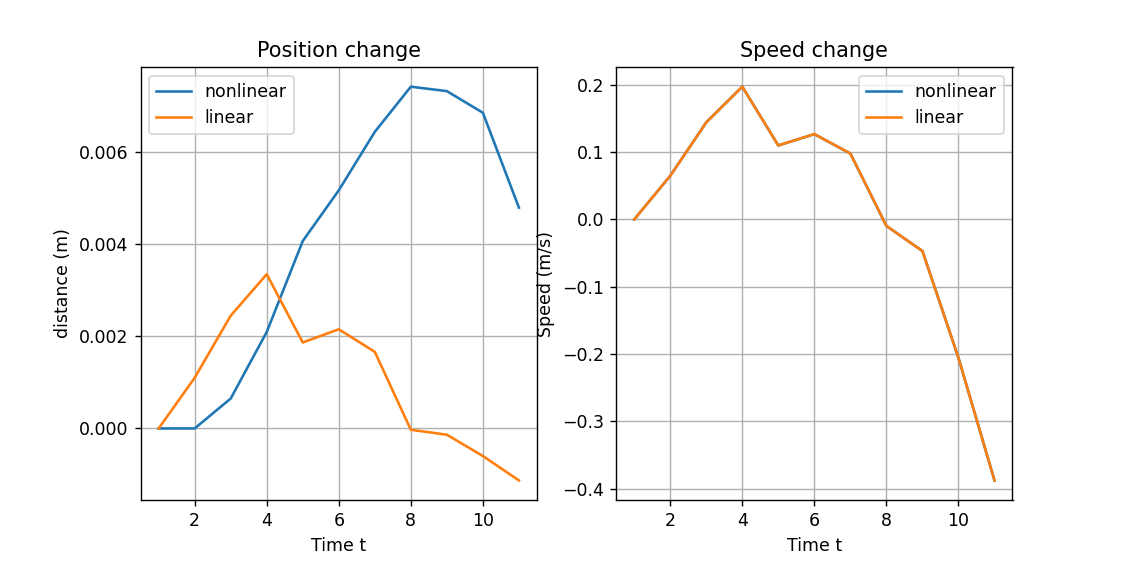

In [11]:
file_name3=file_name2
result_sample(path,model_name,model3,file_name3,index=100)

In [5]:
# create dataset (optional)
'''model_name = 'damping'
path = './dataset/damping_0.1x10000_Ts_0.01'
device = "cuda:0" if torch.cuda.is_available() else "cpu"
file_name = 'hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 1]_model_name_damping'
saved_model_path = './weight/{}_checkpoint.pt'.format(file_name)
checkpoint = Checkpoint(saved_model_path)

# load model
n = 2
K = 0
model = Koopman(n=n,K=K,u=1)
loss_function = torch.nn.MSELoss(reduction = 'sum')
model=checkpoint.load_saved_model(model)
model = model.to(device)
model.eval()'''
submodules = []
for idx, m in enumerate(model.children()):
    submodules.append(m)
en = submodules[0]
de = submodules[1]
print(submodules)

# get input
lifted_xx = np.random.rand(9,n+K)
lifted_uu = np.random.rand(9,1)
print(lifted_xx)
X = torch.tensor(np.atleast_2d(lifted_xx)).float().to(device)
U = torch.tensor(np.atleast_2d(lifted_uu)).float().to(device)
Y = de(X)
Z = model(X,U)
yy = Y.cpu().detach().numpy().squeeze()
zz = Z.cpu().detach().numpy().squeeze()
print(yy)
print(zz)


[encoder(
  (layer_1): Sequential(
    (0): ReLU()
    (1): Linear(in_features=2, out_features=2, bias=False)
  )
), decoder(
  (layer_4): Sequential(
    (0): ReLU()
    (1): Linear(in_features=2, out_features=2, bias=False)
  )
)]
[[0.14987226 0.37642263]
 [0.14986438 0.18224725]
 [0.3203109  0.48927981]
 [0.50801971 0.66547996]
 [0.68612743 0.55833652]
 [0.56898457 0.52217071]
 [0.76849498 0.68213096]
 [0.9323333  0.71959992]
 [0.42075679 0.39620127]]
[[ 0.24556114 -0.07668509]
 [ 0.06574264 -0.07951938]
 [ 0.2328971  -0.16850153]
 [ 0.2670208  -0.2688627 ]
 [ 0.0453437  -0.36810088]
 [ 0.09238897 -0.30439   ]
 [ 0.10335918 -0.41146043]
 [ 0.02541671 -0.5007594 ]
 [ 0.07763944 -0.22494541]]
[[0.14376467 0.0022694 ]
 [0.14694646 0.00231963]
 [0.31243566 0.00493196]
 [0.49734506 0.00785085]
 [0.67730296 0.01069158]
 [0.5606949  0.00885086]
 [0.7576786  0.01196035]
 [0.92098445 0.01453822]
 [0.4144614  0.00654249]]


[[ 0.          0.        ]
 [ 0.06480062  0.        ]
 [ 0.14418004  0.00064801]
 [ 0.1971825   0.00208981]
 [ 0.10990521  0.00406163]
 [ 0.12671844  0.00516068]
 [ 0.09786495  0.00642787]
 [-0.00963197  0.00740652]
 [-0.04688404  0.0073102 ]
 [-0.20558213  0.00684136]
 [-0.38762148  0.00478554]]
[[ 0.          0.        ]
 [ 0.06480062  0.        ]
 [ 0.14418004  0.00064801]
 [ 0.1971825   0.00208981]
 [ 0.10990521  0.00406163]
 [ 0.12671844  0.00516068]
 [ 0.09786495  0.00642787]
 [-0.00963197  0.00740652]
 [-0.04688404  0.0073102 ]
 [-0.20558213  0.00684136]
 [-0.38762148  0.00478554]]
[[ 0.          0.        ]
 [ 0.07604007  0.0006251 ]
 [ 0.16236007  0.00164215]
 [ 0.20936449  0.00271263]
 [ 0.08617374  0.00263547]
 [ 0.09432331  0.00322392]
 [ 0.04711397  0.00343706]
 [-0.2305827   0.00805094]
 [-0.227584    0.00794624]
 [-0.21298788  0.00743661]
 [-0.14898525  0.00520191]]


<IPython.core.display.Javascript object>


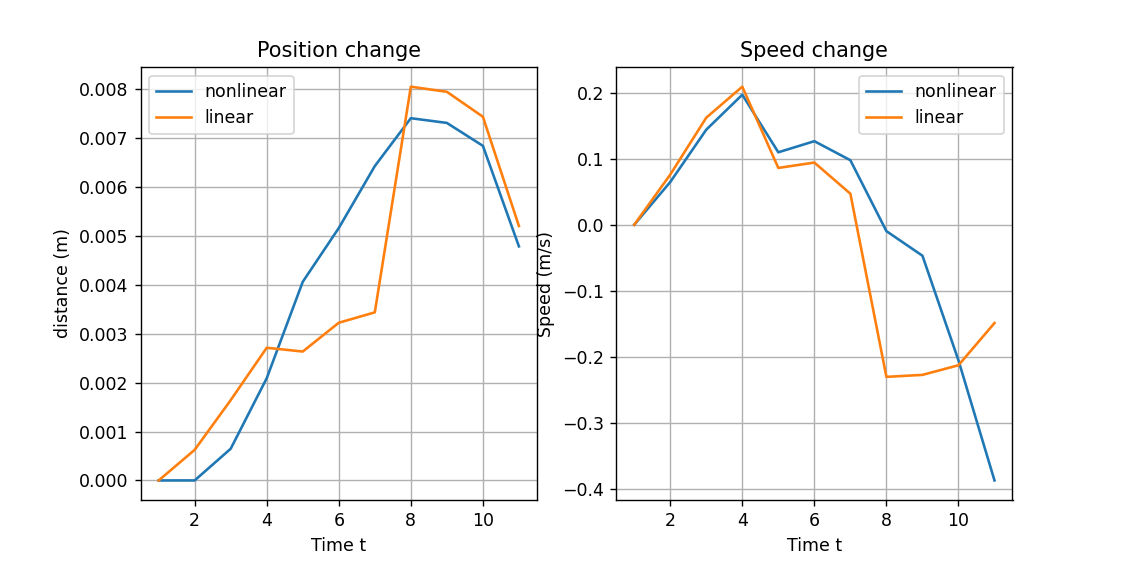

In [11]:
result_sample(path,model_name,model,file_name,index=100)

## Dataset generation

In [2]:
# create dataset (optional)
model_name = 'damping'
SimLength=2
Ntraj = 2000
Ts=0.01
path = produce_dataset(x_range,u_range,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)

  0%|          | 0/400 [00:00<?, ?it/s]

Start simulating...


100%|██████████| 400/400 [00:00<00:00, 8718.92it/s]


Dataset produced.
Dataset saved.
./dataset/x-[0.1 0.1 0.1 0.5 0.5 1.5]_u-[1. 1. 1.]_0.02x2000_Ts_0.01


## Model training

### Preparation

### Initial baseline - from paper

## Result Analysis

In [1]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders
from train import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

In [2]:
model_name = 'damping'
SimLength=1
Ntraj = 100000
Ts=0.01
path = produce_dataset(model_name,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)

  3%|▎         | 2056/60000 [00:00<00:02, 20367.96it/s]

Start simulating...


100%|██████████| 20000/20000 [00:00<00:00, 20175.22it/s]


Dataset produced.
Dataset saved.
./dataset/damping_0.01x100000_Ts_0.01


In [2]:
# create dataset (optional)
model_name = 'damping'
path = './dataset/damping_0.1x100000_Ts_0.01'

# get dataloaders
train_loader, val_loader, test_loader = get_dataloaders(path)

# trainers parameter setting
n = 2
K = 14
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# create trainer
model = Koopman(n=n,K=K,u=1)
hyper = [1.0,0.,0.,0.,0.,0.,1]
loss_function = loss = torch.nn.MSELoss(reduction = 'sum')

# start training
file_name = train_the_model(device, model_name, model, loss_function, train_loader, val_loader, hyper,epochs=3,batch_size=10,P=hyper[6])

# get test result
test_the_model(test_loader, model, loss_function, file_name)
print(file_name)

# see single trajectory(optional)
result_sample(path,model_name,model,file_name,index=2)

  0%|          | 0/6000 [00:00<?, ?it/s]

Trainer created.


Epoch 0:   0%|          | 0/6000 [00:01<?, ?it/s]


RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 1. Got 1 and 16 in dimension 2 at C:/w/1/s/windows/pytorch/aten/src\THC/generic/THCTensorMath.cu:71

In [ ]:
submodules = []
for idx, m in enumerate(model.named_children()):
    submodules.append(m)
en = submodules[0][1]
de = submodules[1][1]
K = submodules[2][1]
print(en)
print(de)
print(K)

In [3]:
for name, param in model.named_parameters():
    print(param)

Parameter containing:
tensor([[ 0.5521,  0.5251],
        [ 0.9670,  0.6452],
        [ 0.9755,  0.1917],
        [-0.0526,  0.3427],
        [-0.2659,  0.6184],
        [ 0.5746, -0.1753],
        [-0.5604,  0.0200],
        [-0.5001,  0.1093],
        [ 0.8700,  0.1736],
        [ 0.8548,  0.1477],
        [-0.4287,  0.2388],
        [-0.6095, -0.0021],
        [-0.4396, -0.0175],
        [ 1.0878, -0.5822],
        [-0.0799,  0.3363],
        [-0.4780,  0.5513],
        [ 1.0322,  0.4865],
        [ 0.5536,  0.5586],
        [ 0.5133,  0.6144],
        [ 0.6240, -0.0297],
        [ 0.9073,  0.5146],
        [-0.4367,  0.2144],
        [-0.2852, -0.4617],
        [-0.0963, -0.5486],
        [ 0.7212,  0.0817],
        [-0.6137,  0.2930],
        [ 1.1183, -0.5498],
        [-0.5617,  0.6735],
        [ 0.5628, -0.6228],
        [ 0.8651,  0.0873],
        [-0.6281, -0.6901],
        [ 1.0539, -0.1229]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1185,  0.0

In [8]:
xx = np.load(path+"/X_test.npy")
xx = xx[0,:,:]
xx = torch.tensor(xx).float()
xx = xx.unsqueeze(0)
x = xx[:,2,:]
print(x.shape)

torch.Size([1, 6])


In [8]:
index = 3
xx = np.load(path+"/X_test.npy")
uu = np.load(path+"/U_test.npy")
xx = xx[index]
uu = uu[index]
yy = xx[:-1]
print(xx.shape)
print(uu.shape)
print(yy.shape)

(101, 6)
(100, 3)
(100, 6)


In [3]:
for i, data in enumerate(test_loader):
    X, U=data
    X = X.to(device)
    U = U.to(device)
    loss = loss_function(model,X,U) 
print(U.shape)

torch.Size([1, 3, 100])


In [5]:
model = Koopman(hidden_layer=2)
submodules = []
for idx, m in enumerate(model.named_children()):
    submodules.append(m)
en = submodules[0][1]
de = submodules[1][1]
K = submodules[2][1]
print(en)

encoder(
  (input_layer): Sequential(
    (0): Linear(in_features=6, out_features=30, bias=True)
    (1): ReLU()
  )
  (hidden_layers): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): ReLU()
  )
)


In [9]:
print(torch.cuda.device_count())

1


In [3]:
for name, param in model.named_parameters():
    print(param)

Parameter containing:
tensor([[ 0.1634, -0.1321, -0.3789, -0.2369,  0.2696,  0.2819],
        [-0.1659,  0.0839, -0.0814, -0.1603,  0.0260,  0.0618],
        [-0.2136,  0.2609,  0.2690,  0.0800,  0.1249,  0.2763],
        [ 0.1359, -0.0447,  0.0203, -0.1896,  0.2178,  0.1025],
        [ 0.2433, -0.3513, -0.2933, -0.1141, -0.3179,  0.3055],
        [-0.2136, -0.0317,  0.1539, -0.1149,  0.2557, -0.3906],
        [ 0.3235,  0.2800,  0.3244, -0.4045,  0.1815, -0.1580],
        [ 0.3538, -0.2212, -0.3395, -0.2431,  0.1884,  0.0690],
        [ 0.1700, -0.2066,  0.2711, -0.2969, -0.3780, -0.0643],
        [ 0.0086, -0.1699,  0.3263, -0.1935,  0.3561, -0.1834],
        [-0.2999, -0.2621,  0.2051, -0.0623,  0.2622,  0.3451],
        [ 0.0678, -0.2828, -0.0611, -0.0988,  0.2126, -0.0568],
        [ 0.2961, -0.1256,  0.0666, -0.1656, -0.2574, -0.3966],
        [ 0.1050,  0.0308,  0.3170, -0.3695, -0.3836,  0.2249],
        [-0.1642,  0.2283,  0.0361,  0.0120, -0.3436, -0.3950],
        [-0.2912, 

Parameter containing:
tensor([-0.0764, -0.1289, -0.1762, -0.1576,  0.0517, -0.1335,  0.0365,  0.1369,
        -0.1642,  0.0109,  0.0772,  0.0422,  0.0036,  0.1110,  0.0328, -0.1126,
         0.1392, -0.0331,  0.0291, -0.0660, -0.0830,  0.1390,  0.0785, -0.0264,
        -0.0855,  0.0725,  0.1374, -0.1720,  0.0512,  0.1843], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[-5.9328e-02,  6.1173e-05, -1.0362e-01, -3.4591e-02, -1.6624e-01,
          1.4674e-01, -9.2415e-03,  1.4375e-01,  1.4854e-01, -3.3646e-02,
          3.4771e-02,  6.5321e-03, -1.9188e-01, -1.3557e-01, -3.5404e-02,
         -4.9992e-02,  1.6556e-01,  6.5627e-03,  1.6790e-01,  1.1053e-01,
         -4.8428e-02, -1.1812e-01,  5.1682e-02, -1.9632e-01,  1.4156e-01,
          8.3279e-02, -5.3231e-02,  6.6371e-02, -1.5765e-01,  9.4691e-02],
        [-1.1652e-01, -1.2235e-01,  1.3065e-01, -2.9942e-02, -1.4474e-01,
          1.0060e-01,  1.1060e-01, -3.8935e-02, -7.4191e-02, -9.3466e-03,
          5.3858

Parameter containing:
tensor([-0.0567,  0.1349, -0.0141, -0.0881, -0.1290, -0.0458,  0.1863, -0.0949,
         0.1289, -0.1515, -0.1733, -0.1752, -0.1665,  0.0457,  0.0643, -0.1201,
        -0.0595, -0.1435,  0.1932, -0.1162,  0.1427, -0.1748,  0.0586,  0.1530,
         0.1622,  0.1200, -0.0302,  0.0573,  0.0075,  0.0105], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[-7.9286e-02,  8.0532e-02, -5.4395e-03, -1.0054e-01,  9.9546e-02,
          1.4527e-01,  2.6148e-02, -8.0447e-02, -2.1241e-02, -3.7661e-02,
         -1.0699e-01, -5.9146e-02,  1.4495e-01,  1.2502e-01,  1.7651e-01,
         -9.3032e-02,  3.0874e-02, -1.4122e-01,  5.5096e-02, -1.4797e-01,
          1.2387e-01, -1.0087e-01,  1.3244e-01, -4.5508e-02,  1.6836e-01,
          1.7689e-02,  5.7649e-02,  4.6980e-02, -9.6370e-03,  7.8076e-02],
        [ 3.8323e-02, -1.3968e-01, -1.0315e-01,  8.5497e-03,  1.1352e-01,
         -5.1236e-02,  9.8055e-02,  3.0196e-02,  5.6909e-02, -1.8875e-02,
         -1.5386

Parameter containing:
tensor([-0.0373,  0.0937,  0.2009, -0.1361,  0.1344,  0.0563, -0.1746, -0.1203,
         0.0369, -0.0988, -0.1224,  0.0881,  0.0327, -0.0837, -0.1005, -0.1626,
        -0.1777,  0.0359,  0.1043, -0.1484, -0.0464, -0.0693,  0.0756,  0.1025,
        -0.0698,  0.0608,  0.0874,  0.0741,  0.0883,  0.1011], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[ 1.7384e-01,  1.6538e-01, -5.1024e-02, -6.3549e-02, -1.8915e-01,
          8.7577e-03, -1.2549e-01,  7.2616e-04, -3.7742e-02, -3.1137e-02,
         -4.6134e-02,  3.7959e-02,  4.4066e-02, -8.7672e-02,  7.5773e-02,
         -1.6159e-01,  1.3070e-01,  1.5773e-02, -4.5569e-02, -1.5639e-01,
         -1.7516e-01,  5.9305e-02,  5.7551e-02,  6.8502e-02,  1.1797e-01,
         -3.1623e-02, -4.6658e-02,  1.1292e-01, -1.6779e-01, -4.6878e-02],
        [ 9.2049e-02,  7.5946e-02,  7.4613e-02, -4.9273e-02, -9.4913e-02,
          1.0834e-01,  6.1824e-02, -1.3730e-01,  8.6739e-02,  8.2199e-02,
          1.5313

Parameter containing:
tensor([ 0.0287, -0.1103, -0.1092,  0.0461, -0.1578, -0.1349, -0.1407, -0.0610,
        -0.1346,  0.0398, -0.0198, -0.0783, -0.1665,  0.1629, -0.0674, -0.1237,
         0.0739,  0.0409,  0.0911,  0.0264, -0.1458,  0.0900, -0.1254, -0.0105,
        -0.0138,  0.1018, -0.0130, -0.0141,  0.1948, -0.1159], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[-0.1268, -0.0607, -0.0758,  0.0946,  0.0115, -0.1144,  0.0181,  0.1138,
          0.1610,  0.0093, -0.1093, -0.1221,  0.1716, -0.1244,  0.1777,  0.1340,
         -0.0645, -0.1219,  0.1560,  0.0936,  0.0255,  0.0956,  0.0204,  0.1668,
         -0.1237, -0.0831,  0.0680,  0.1607,  0.1477,  0.0012],
        [-0.1511,  0.0669,  0.0739, -0.1723, -0.0558, -0.1579, -0.0570,  0.1393,
         -0.0920,  0.0890, -0.0818, -0.1684,  0.1463,  0.0822, -0.0679, -0.0899,
         -0.1312, -0.1168, -0.0601, -0.1698, -0.0023,  0.0540,  0.0483,  0.0702,
          0.1077,  0.0448,  0.0478,  0.0066, -0.0725, -0.00